In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils_v2 import *
# from models import 

In [2]:
torch.cuda.empty_cache()

#### Goose and Jester

In [3]:
val_dates = ['171021','171023','180711','180714']
test_dates = ['171020','171022','180712','180713']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/'
# test_imbalance(load_path, val_dates, test_dates, bad_dates, test_train=True)

In [4]:
CH = 'all'
device = torch.device("cuda:1")
# device = torch.device('cuda')

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=256)

In [5]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 62, 100, 10])
torch.Size([256, 1])
256
256
256


date:180412, rec:003, time:2716.0, label:1.0
date:180330, rec:009, time:4841.0, label:0.0


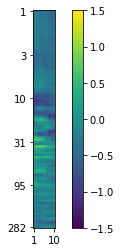

date:180331, rec:007, time:1560.0, label:1.0
date:180323, rec:004, time:5429.0, label:1.0
date:180325, rec:002, time:4328.0, label:1.0
date:180327, rec:001, time:2070.0, label:0.0


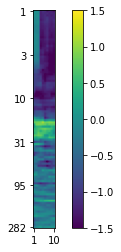

date:180411, rec:002, time:6917.0, label:1.0
date:180327, rec:007, time:3950.0, label:0.0


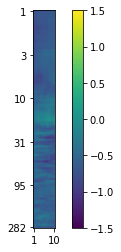

date:180412, rec:005, time:1207.0, label:1.0
date:180325, rec:007, time:4353.0, label:0.0


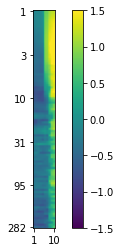

date:180330, rec:008, time:6725.0, label:0.0


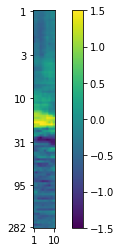

date:180414, rec:001, time:2449.0, label:0.0


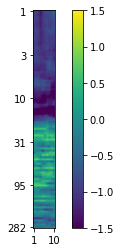

date:180325, rec:001, time:5036.0, label:1.0
date:180331, rec:007, time:5247.0, label:0.0


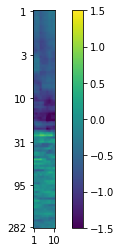

date:180331, rec:007, time:5948.0, label:0.0


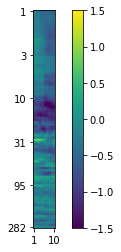

date:180412, rec:001, time:3493.0, label:0.0


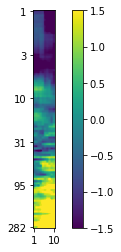

date:180330, rec:004, time:4705.0, label:1.0
date:180413, rec:003, time:1580.0, label:0.0


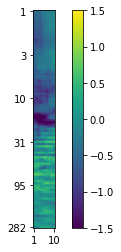

date:180323, rec:004, time:4769.0, label:1.0
date:180413, rec:001, time:5927.0, label:0.0


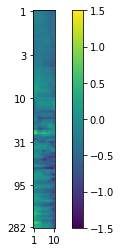

date:180331, rec:007, time:5368.0, label:0.0


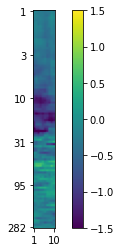

date:180331, rec:001, time:4846.0, label:1.0
date:180413, rec:002, time:6761.0, label:0.0


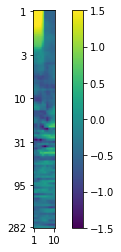

date:180414, rec:007, time:4378.0, label:0.0


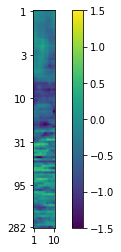

date:180413, rec:003, time:1690.0, label:1.0
date:180413, rec:003, time:6971.0, label:0.0


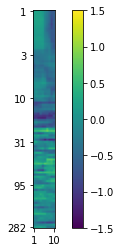

date:180323, rec:003, time:3241.0, label:1.0
date:180411, rec:006, time:7044.0, label:0.0


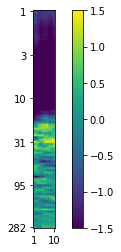

date:180323, rec:002, time:4496.0, label:1.0
date:180324, rec:006, time:1841.0, label:1.0
date:180330, rec:001, time:2046.0, label:1.0
date:180413, rec:004, time:1846.0, label:1.0
date:180413, rec:002, time:1270.0, label:0.0


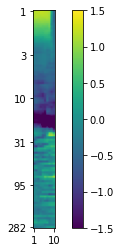

date:180324, rec:006, time:2051.0, label:1.0
date:180324, rec:001, time:2091.0, label:1.0
date:180325, rec:005, time:120.0, label:0.0


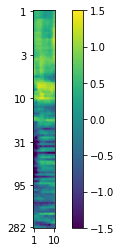

date:180323, rec:004, time:6591.0, label:1.0
date:180412, rec:005, time:4867.0, label:0.0


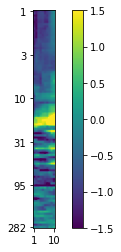

date:180325, rec:009, time:2250.0, label:0.0


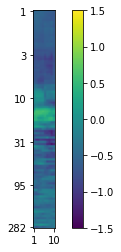

date:180409, rec:006, time:6898.0, label:0.0


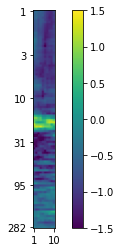

date:180410, rec:005, time:1838.0, label:0.0


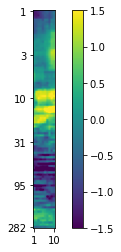

date:180331, rec:003, time:4918.0, label:1.0
date:180409, rec:005, time:600.0, label:1.0
date:180327, rec:006, time:4718.0, label:1.0
date:180411, rec:004, time:2237.0, label:1.0
date:180331, rec:007, time:2947.0, label:0.0


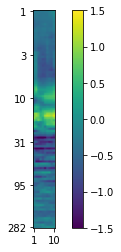

date:180327, rec:005, time:5568.0, label:0.0


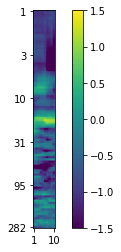

date:180414, rec:003, time:6011.0, label:1.0
date:180323, rec:002, time:4915.0, label:1.0
date:180409, rec:006, time:6608.0, label:0.0


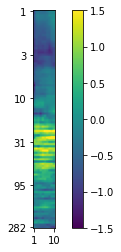

date:180413, rec:007, time:3522.0, label:1.0
date:180414, rec:003, time:4509.0, label:1.0
date:180414, rec:004, time:2846.0, label:1.0
date:180401, rec:001, time:990.0, label:0.0


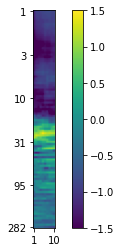

date:180411, rec:005, time:1730.0, label:1.0
date:180414, rec:004, time:6065.0, label:1.0
date:180412, rec:006, time:5528.0, label:0.0


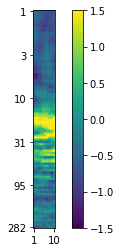

date:180414, rec:005, time:3586.0, label:1.0
date:180413, rec:002, time:1850.0, label:0.0


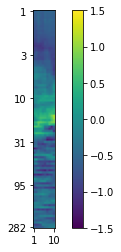

date:180411, rec:002, time:3755.0, label:1.0
date:180325, rec:001, time:6500.0, label:1.0
date:180325, rec:007, time:2796.0, label:0.0


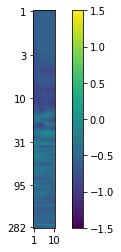

date:180401, rec:002, time:2916.0, label:1.0
date:180411, rec:006, time:5652.0, label:0.0


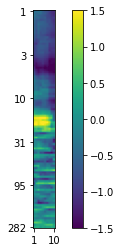

date:180331, rec:007, time:3917.0, label:0.0


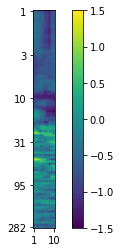

date:180323, rec:007, time:6631.0, label:0.0


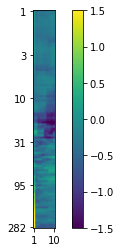

date:180409, rec:003, time:5907.0, label:1.0
date:180410, rec:004, time:1148.0, label:1.0
date:180413, rec:002, time:5891.0, label:0.0


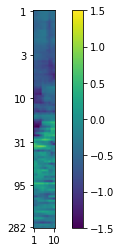

date:180324, rec:009, time:360.0, label:0.0


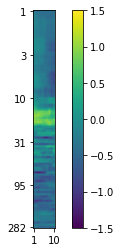

date:180331, rec:005, time:4647.0, label:1.0
date:180325, rec:009, time:2050.0, label:0.0


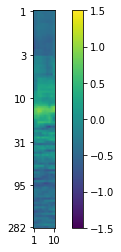

date:180414, rec:001, time:3904.0, label:0.0


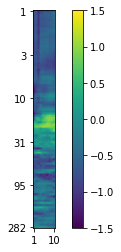

date:180327, rec:008, time:4983.0, label:0.0


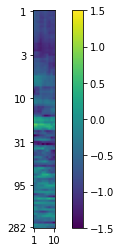

date:180325, rec:006, time:5670.0, label:1.0
date:180327, rec:008, time:5863.0, label:0.0


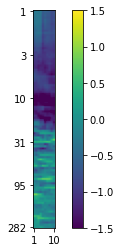

date:180330, rec:008, time:6675.0, label:0.0


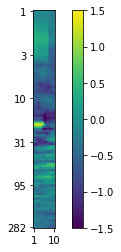

date:180411, rec:006, time:2292.0, label:1.0
date:180329, rec:001, time:5689.0, label:1.0
date:180413, rec:002, time:6951.0, label:0.0


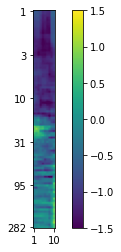

date:180409, rec:003, time:6147.0, label:1.0
date:180324, rec:003, time:6018.0, label:1.0
date:180331, rec:007, time:3367.0, label:0.0


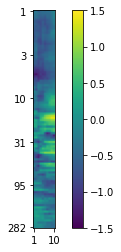

date:180327, rec:007, time:3260.0, label:0.0


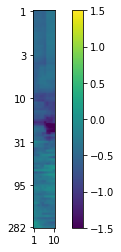

date:180413, rec:005, time:5847.0, label:1.0
date:180401, rec:001, time:5477.0, label:0.0


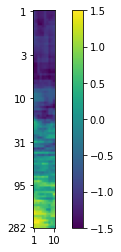

date:180411, rec:006, time:6384.0, label:0.0


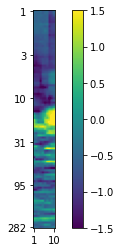

date:180324, rec:004, time:2579.0, label:1.0
date:180325, rec:003, time:6257.0, label:1.0
date:180327, rec:001, time:7062.0, label:0.0


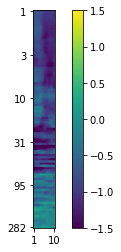

date:180409, rec:003, time:3389.0, label:1.0
date:180330, rec:009, time:5711.0, label:0.0


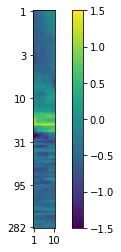

date:180325, rec:009, time:2220.0, label:0.0


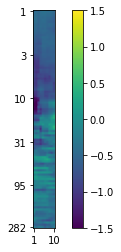

date:180324, rec:009, time:2202.0, label:1.0
date:180330, rec:009, time:1484.0, label:0.0


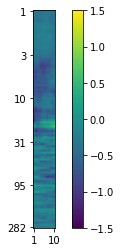

date:180329, rec:006, time:3909.0, label:1.0
date:180330, rec:001, time:630.0, label:0.0


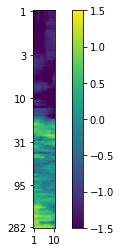

date:180323, rec:002, time:2626.0, label:1.0
date:180325, rec:004, time:180.0, label:1.0
date:180322, rec:007, time:2253.0, label:0.0


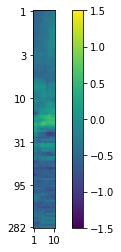

date:180327, rec:001, time:1240.0, label:0.0


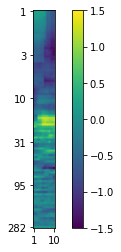

date:180331, rec:007, time:4767.0, label:0.0


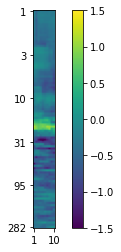

date:180414, rec:007, time:3917.0, label:0.0


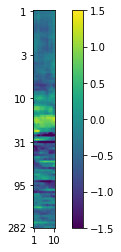

date:180322, rec:003, time:1863.0, label:1.0
date:180324, rec:001, time:5742.0, label:1.0
date:180412, rec:006, time:620.0, label:1.0
date:180411, rec:002, time:590.0, label:1.0
date:180411, rec:003, time:817.0, label:1.0
date:180414, rec:007, time:4898.0, label:0.0


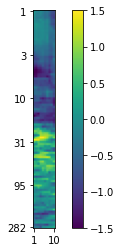

date:180325, rec:004, time:4415.0, label:1.0
date:180324, rec:001, time:6767.0, label:1.0
date:180327, rec:007, time:3960.0, label:0.0


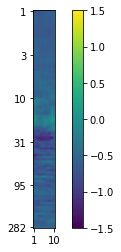

date:180327, rec:005, time:2680.0, label:1.0
date:180324, rec:004, time:4119.0, label:1.0
date:180409, rec:006, time:4758.0, label:0.0


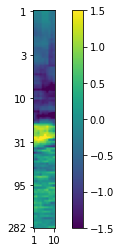

date:180413, rec:001, time:170.0, label:0.0


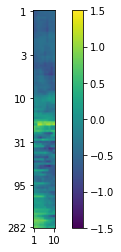

date:180411, rec:007, time:80.0, label:0.0


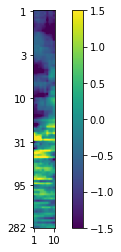

date:180414, rec:001, time:800.0, label:0.0


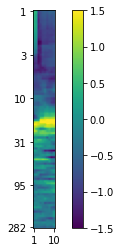

date:180330, rec:006, time:3588.0, label:1.0
date:180325, rec:001, time:1730.0, label:0.0


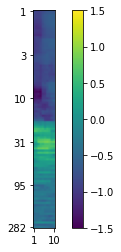

date:180327, rec:008, time:5713.0, label:0.0


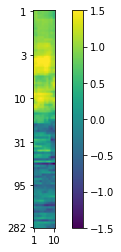

date:180327, rec:007, time:2150.0, label:0.0


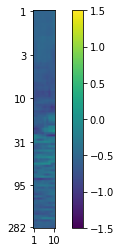

date:180329, rec:006, time:4727.0, label:0.0


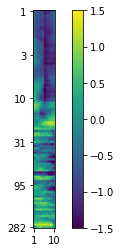

date:180330, rec:008, time:4727.0, label:0.0


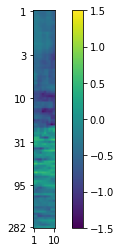

date:180327, rec:002, time:2460.0, label:1.0
date:180414, rec:007, time:4698.0, label:0.0


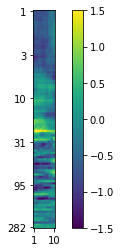

date:180413, rec:008, time:5873.0, label:1.0
date:180331, rec:007, time:3537.0, label:0.0


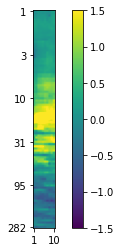

In [6]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [6]:
class CNN(nn.Module):
    def __init__(self,p_dropout):
        super(CNN,self).__init__()
    
        # convolutional layer (sees 1x100x10 image tensor)
        self.conv1 = nn.Conv2d(in_channels=62, out_channels=2,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # convolutional layer (sees 2x50x5 tensor)
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=4,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # sees a layer 4x25x2
        self.fc1 = nn.Linear(4*25*2,1)
        
        # Max pooling
        self.pool = nn.MaxPool2d(2,2)
        # dropout layer 
        self.dropout = nn.Dropout(p_dropout)
         # batch normalization 
        self.bn1 = nn.BatchNorm2d(2)
        self.bn2 = nn.BatchNorm2d(4)
      
    def forward(self,x):
        
        x = x.float()
        
        conv_x1 = self.conv1(x)
        x = self.pool(F.relu(self.bn1(conv_x1))) # Convolution 1:

        conv_x2 = self.conv2(x)
        x = self.pool(F.relu(self.bn2(conv_x2))) # Convolution 2:

        x = x.view(x.shape[0],-1) # flatten image input
        
        x = self.dropout(x) # dropout
        x = self.fc1(x) # Fully connected layer
        
        return x, conv_x1, conv_x2

In [7]:
learning_rate = 0.001
tol = 0.01
p_dropout = 0.4

num_epochs = 51
model_name = 'CNN'
model_type = 'LR'
alpha = 0
loss_type = 'bce'
reg_type = 'none'
series = 'Goose_and_Jester'

device = torch.device("cuda:1")

model = CNN(p_dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss(reduction='mean')
model

CNN(
  (conv1): Conv2d(62, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200, out_features=1, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.4, inplace=False)
  (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [9]:
(data, labels, _, _, _) = next(iter(train_loader))
data = data.to(device)
output, conv1, conv2 = model(data)
output.shape
criterion

BCELoss()

In [10]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc, conv1, conv2 = train(model, optimizer, criterion, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, criterion, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    if val_loss <= min(val_losses):
        best_epoch = epoch
        print(epoch)
        path = '/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window'
        torch.save(model.state_dict(), '{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        torch.save(conv1,'{}/conv_layer_1_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        torch.save(conv2,'{}/conv_layer_2_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        

Train loss for epoch 0: 0.0013824590714648366
Val loss for epoch 0: 0.0039735594764351845
0
Train loss for epoch 1: 0.0010245395824313164
Val loss for epoch 1: 0.0037112850695848465
1
Train loss for epoch 2: 0.0009179924963973463
Val loss for epoch 2: 0.0038187114987522364
Train loss for epoch 3: 0.0009152297861874104
Val loss for epoch 3: 0.003134592669084668
3
Train loss for epoch 4: 0.0008487944724038243
Val loss for epoch 4: 0.0039046905003488064
Train loss for epoch 5: 0.0008110779454000294
Val loss for epoch 5: 0.004980378784239292
Train loss for epoch 6: 0.0007803784101270139
Val loss for epoch 6: 0.004405611660331488
Train loss for epoch 7: 0.0007731273653917015
Val loss for epoch 7: 0.007642668671905994
Train loss for epoch 8: 0.0007579080993309617
Val loss for epoch 8: 0.0052436101250350475
Train loss for epoch 9: 0.0007502057706005871
Val loss for epoch 9: 0.007132608909159899
Train loss for epoch 10: 0.0007421465707011521
Val loss for epoch 10: 0.008249340578913689
Train lo

In [12]:
p_dropout

0.4

In [13]:
loss_train = [training_losses[idx].cpu().detach().item() for idx in range(len(training_losses))]
loss_val = [val_losses[idx].cpu().detach().item() for idx in range(len(val_losses))]

loss_train = np.array(loss_train)
loss_val = np.array(loss_val)

np.save('{}/loss_train_CH{}_LOSS{}_DROPOUT{}_MODEL_{}_SERIES_{}'.format(path, CH, loss_type, p_dropout,model_name,series),loss_train)
np.save('{}/loss_val_CH{}_LOSS{}_DROPOUT{}_MODEL_{}_SERIES_{}'.format(path, CH, loss_type, p_dropout,model_name,series),loss_val)

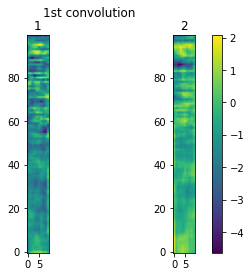

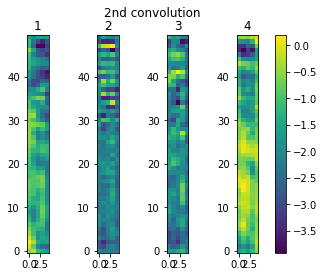

In [14]:
# =============================================================================
#  FILTERS CNN
# =============================================================================
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'

# 1st level
fig, axes = plt.subplots(1, 2)
fig.suptitle('1st convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv1[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
fig.savefig('{}/1st_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))


# 2nd level 
fig, axes = plt.subplots(1, 4)
fig.suptitle('2nd convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv2[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
fig.savefig('{}/2nd_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))

In [15]:
def plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, model_name):
    fig = plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_losses, linewidth = 1.5, label = 'train')
    plt.plot(val_losses, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Loss", fontsize = 15)
    plt.legend()
    plt.subplot(1,2,2)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_acc, linewidth = 1.5, label = 'train')
    plt.plot(validation_acc, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Accuracy", fontsize = 15)
    plt.legend()
    plt.show()
    return fig

In [16]:
p_dropout

0.4

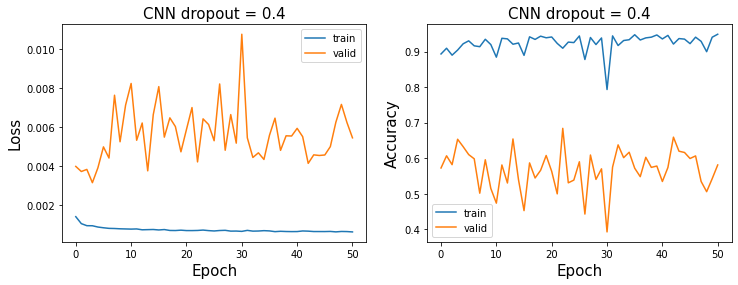

In [17]:
fig = plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, 'CNN dropout = 0.4') 

In [18]:
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures'
path_fig_model = '/CNN_10_sec_window'

fig.savefig(path_fig + path_fig_model + '/MODEL_{}_CH{}_LOSS{}_DROPOUT{}_EPOCH{}_SERIES_{}.png'.format(model_name,CH,loss_type,p_dropout,epoch,series))
plt.close(fig)

In [5]:
best_epoch

NameError: name 'best_epoch' is not defined

In [9]:
epoch = 3 
path = '/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window'

# model = CNN(p_dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model.load_state_dict(torch.load('{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series)))

loader = test_loader
train_loss, train_acc, train_preds, train_preds_probs, train_labels, _, _, _, cases_wrong_train = evaluate(model, optimizer, criterion, loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('train loss:{}, train accuracy:{}, train percentage postive:{}'.format(train_loss, train_acc, np.mean(np.concatenate(train_labels))))

train loss:0.001657193643040955, train accuracy:0.8258942703387148, train percentage postive:0.8211459517478943


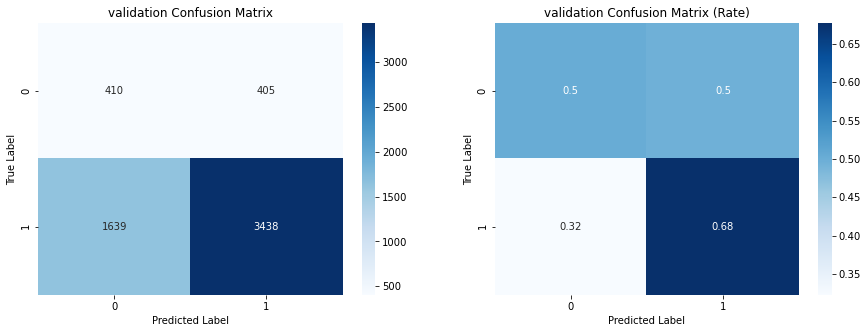

In [23]:
def plot_confusion(test_preds, test_labels,title):
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    cm_test = confusion_matrix(labels_test, predictions_test)
    cm_test_percent = (cm_test.T/cm_test.astype(np.float).sum(axis=1)).T
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    sn.heatmap(cm_test, annot = True,  fmt = 'd', cmap='Blues')
    plt.title('{} Confusion Matrix'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplot(1,2,2)
    sn.heatmap(cm_test_percent, annot = True, cmap='Blues')
    plt.title('{} Confusion Matrix (Rate)'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    return fig

data_set = 'validation'
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'
fig = plot_confusion(train_preds, train_labels,data_set)
fig.savefig('{}/{}_confusion_matrix_CNN_CH_{}_DROPOUT_{}_EPOCH_{}_SERIES_{}.png'.format(path_fig,data_set,CH,p_dropout,epoch,series))